In [2]:
%pip install folium shapely

     ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
     ------------------------ -------------- 71.7/113.4 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 113.4/113.4 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
     ---------------------------------------  133.1/134.9 kB ? eta -:--:--
     -------------------------------------- 134.9/134.9 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/90.4 kB ? eta -:--:--
     ---------------------------------------- 90.4/90.4 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import folium
from shapely.geometry import shape, Point
import json

In [12]:
# Replace with your actual GeoJSON string from get_union_coordinates
geojson_str = '''{"type":"Polygon","coordinates":[[[14.1007873675,100.3414987804],[14.0974459977,100.3414441075],[14.0965177519,100.3412949837],[14.0936975009,100.3406256784],[14.0853494381,100.3378192961],[14.0832405423,100.3368679689],[14.0782615288,100.3349871219],[14.0754456077,100.3342980857],[14.0708620247,100.3333429193],[14.0668870203,100.3324119051],[14.0651484288,100.3320716097],[14.0611838169,100.3317329463],[14.0564628509,100.3316274718],[14.0555925722,100.3317661271],[14.0497115219,100.3329212718],[14.0470989602,100.3335760552],[14.0437215152,100.3345991747],[14.0379130635,100.3365776926],[14.0351654088,100.3380591625],[14.0277926355,100.3416346462],[14.0256793958,100.3424577879],[14.0236941372,100.3430735291],[14.0220083238,100.3437268954],[14.0146708845,100.3475083834],[14.0069803248,100.3519088112],[14.0036553416,100.3539568649],[14.0004455462,100.3557610593],[14.0007636843,100.356129554],[14.0007273302,100.3561713961],[13.9996108481,100.3569731396],[13.99461757,100.3610392148],[13.993990255,100.3617677909],[13.9923476694,100.3644449055],[13.9920478282,100.3652392222],[13.9917393349,100.366536564],[13.9914663985,100.3686344062],[13.9911338009,100.3703104341],[13.9900813768,100.37519193],[13.9896976548,100.3765440659],[13.9888121529,100.3804991802],[13.9947755933,100.3810806071],[13.9947133858,100.3815824336],[13.9918729529,100.3927259786],[13.9839010353,100.4231184039],[13.9824089386,100.4291046035],[13.9812765295,100.4344035158],[13.9810598985,100.4349732897],[13.9795018135,100.4374297008],[13.9791261683,100.4377756263],[13.9780737405,100.4391051311],[13.9710117989,100.4483323278],[13.9673425464,100.4534762974],[13.9689667833,100.4547300634],[13.9692958502,100.4550887609],[13.9693237172,100.4554465664],[13.9697569871,100.4558957022],[13.9708238825,100.4566166722],[13.9721068791,100.4566119828],[13.9749394816,100.4568019851],[13.9762746637,100.4574417577],[13.9770019727,100.4576695486],[13.9775173452,100.4579278945],[13.9766929068,100.4583181126],[13.9762689597,100.4583919736],[13.9763610387,100.460207528],[13.976448684,100.460612484],[13.9759308595,100.4607622779],[13.9758872736,100.4606591227],[13.974750706,100.4609151112],[13.9749622786,100.4616349732],[13.9706946527,100.4624165512],[13.9714204935,100.4648833285],[13.9702933698,100.465481024],[13.9705621027,100.4663655547],[13.9704930628,100.4669445717],[13.9689629741,100.4668257339],[13.9687074049,100.466931089],[13.9639938393,100.4721708189],[13.9622483729,100.4738275045],[13.9609460054,100.4753622635],[13.9604435921,100.4762365802],[13.9593981169,100.4771402174],[13.9584642754,100.4781545616],[13.9567010434,100.4796227958],[13.955325929,100.4810074933],[13.9540206298,100.4819468915],[13.9514673077,100.4843349939],[13.9501275562,100.4862354248],[13.9493435906,100.4866701074],[13.9475497321,100.4872735451],[13.9469492619,100.4879531862],[13.946083017,100.4885964589],[13.9459114014,100.4885476205],[13.9454801043,100.4881247941],[13.9451412448,100.4873851169],[13.9448441914,100.4874469951],[13.9444580253,100.4877910672],[13.9438147711,100.4880317174],[13.9426753902,100.4891256562],[13.9420641591,100.4900918635],[13.9419360643,100.4905773749],[13.9409008201,100.4914456186],[13.9408818027,100.4918341281],[13.9410978354,100.4923587927],[13.9405889496,100.4928032413],[13.9403828574,100.4934945187],[13.940431869,100.4936292424],[13.9407002818,100.4937744147],[13.9407227822,100.4940960139],[13.9403054992,100.4945814817],[13.9402149202,100.4952403351],[13.9397786464,100.4952559434],[13.9396260035,100.4954245693],[13.9394146887,100.4966592503],[13.9389756148,100.4972302509],[13.9391021275,100.4976794478],[13.9390746279,100.4978502206],[13.9384045326,100.4982503883],[13.9377515054,100.4994408063],[13.936982177,100.5001854347],[13.9367187875,100.5017820983],[13.9380633847,100.5024180225],[13.9391243627,100.5030840483],[13.9397492794,100.5036351582],[13.9406042769,100.5045714854],[13.9416513228,100.5059221051],[13.9424926308,100.5072493883],[13.9430524722,100.5084262597],[13.9434351532,100.5096480555],[13.9437371328,100.5114014978],[13.9439232995,100.5139926071],[13.9435103308,100.5219463257],[13.9436293953,100.5257879017],[13.9437746187,100.5269990649],[13.9441171202,100.5285697056],[13.9446016704,100.5300446243],[13.945224031,100.5315207204],[13.9459627201,100.5328935349],[13.947399159,100.5349952747],[13.948192015,100.5357565378],[13.9498907562,100.5370633105],[13.9513819576,100.5379953109],[13.9528633594,100.538602669],[13.9542666297,100.5389420916],[13.9556989166,100.5390273887],[13.9556416054,100.5407733443],[13.955558063,100.5418260751],[13.9554789701,100.5420451635],[13.9553800245,100.5421135492],[13.9552446311,100.5420579662],[13.9547973539,100.5414756358],[13.9546330463,100.541405871],[13.9541366347,100.5417292288],[13.9536798086,100.5418944834],[13.9535784281,100.5420205838],[13.9536335166,100.542269147],[13.9540730524,100.5428008211],[13.9544131811,100.5440492483],[13.9542137143,100.5441682498],[13.9537652878,100.5439113622],[13.953464253,100.5438943924],[13.9532857257,100.5440106435],[13.9529338465,100.5445250664],[13.9529382814,100.5448158112],[13.9532953743,100.545130993],[13.953352253,100.5453425447],[13.9532468185,100.5455191884],[13.952699598,100.5456375864],[13.9525545908,100.545834317],[13.9526675635,100.5471177023],[13.9526200907,100.5483555176],[13.9522032259,100.54897224],[13.9520495728,100.5498437612],[13.9517594552,100.5505350828],[13.9516878178,100.551238996],[13.9511479182,100.5524692744],[13.9511378799,100.5527031699],[13.9513659442,100.5531174504],[13.9513877179,100.5533378087],[13.951246032,100.5535135119],[13.950484748,100.5540052241],[13.9503796592,100.5541766529],[13.9505533298,100.5543676407],[13.9513888274,100.5545140709],[13.9515627054,100.5548207608],[13.951354593,100.5551500204],[13.9502069608,100.5559736443],[13.9501340866,100.5561396183],[13.9501149142,100.5566681234],[13.9498330115,100.5571107215],[13.9504206434,100.5581882242],[13.9505737709,100.5586271402],[13.9507101417,100.5592608412],[13.9506744854,100.560078286],[13.9505528111,100.5604386063],[13.9500143358,100.5606017901],[13.9498712734,100.5611417489],[13.9494580085,100.5614042441],[13.9493808597,100.5616161367],[13.9494670666,100.5617836126],[13.9498960818,100.5620295191],[13.9498547113,100.562308209],[13.9495710758,100.5628731573],[13.9497738909,100.563394851],[13.9497683969,100.5639400986],[13.9498495628,100.5641186891],[13.9503143512,100.5645510592],[13.9506180251,100.5657210677],[13.9503503989,100.5663211389],[13.9503620115,100.5667099518],[13.9510221249,100.566808669],[13.9512032771,100.5675483575],[13.8981691608,100.555015519],[13.8845474404,100.551855428],[13.8844216564,100.5519159151],[13.8840267511,100.5518282807],[13.8496281117,100.5436294723],[13.8493714166,100.5431767079],[13.8487393269,100.5415155427],[13.847278528,100.5382455109],[13.8466647582,100.5374780305],[13.8460420029,100.5359742697],[13.8451335304,100.5350539978],[13.8441208753,100.5337738646],[13.8435045884,100.5332780457],[13.8431355654,100.5326847378],[13.8422289652,100.5318635241],[13.841882512,100.5312373495],[13.8378821779,100.5268967762],[13.8352815166,100.5236910363],[13.8348566691,100.5233547713],[13.8345767053,100.5229090588],[13.8339430739,100.5223645936],[13.8315665192,100.5196184247],[13.8306637837,100.5187062066],[13.8299809234,100.5177160865],[13.8291377294,100.5167882329],[13.8285922278,100.5159332343],[13.828340178,100.5158060998],[13.8275713002,100.5157701386],[13.8270665525,100.5153749004],[13.8262615607,100.5133416359],[13.8259873698,100.5131229626],[13.824733355,100.5130991619],[13.8247457176,100.5127521787],[13.8258909095,100.5121327616],[13.826076711,100.5118332906],[13.8261763057,100.5110103803],[13.8260236349,100.5109100449],[13.8253375152,100.5108291513],[13.8251847362,100.510643189],[13.8252274491,100.510344114],[13.8256191864,100.5094805944],[13.8255220367,100.5092932114],[13.8251549289,100.5091583253],[13.8248806268,100.5092698466],[13.824585542,100.5095151083],[13.8244120996,100.5100917944],[13.8241877238,100.5101217118],[13.8236998887,100.5096832669],[13.8234293815,100.5085952249],[13.8231496108,100.5082868861],[13.822805366,100.5076591649],[13.8224604189,100.5075621674],[13.8216394559,100.5075691526],[13.8211459123,100.5070733012],[13.8200677092,100.5066775579],[13.81933922,100.5062937504],[13.8187218186,100.5063667448],[13.8160383874,100.5074005983],[13.8153201967,100.5104384388],[13.81462708,100.5125289467],[13.8138960467,100.5143983214],[13.8132748398,100.5152551298],[13.8017243778,100.5025481696],[13.8010678623,100.5016798872],[13.8004991681,100.5006813464],[13.7998811428,100.4991383204],[13.7942153409,100.4833688746],[13.7925465295,100.4784008665],[13.7906356873,100.4733507432],[13.7901728244,100.4717018115],[13.7889174033,100.4661768699],[13.7900809636,100.4666525343],[13.7914063973,100.4674353859],[13.7925218002,100.4681595107],[13.7938872235,100.4692335279],[13.7947903554,100.4696583809],[13.7973138602,100.4641542907],[13.7974550605,100.4627962117],[13.7979697765,100.4606110923],[13.7983243046,100.4580898581],[13.7984554448,100.4552519264],[13.7994831868,100.441772751],[13.7995470785,100.4398747965],[13.8000909181,100.4332840604],[13.8001776695,100.4301234082],[13.800341035,100.4287866793],[13.8006242552,100.4235015136],[13.8010816328,100.4172264123],[13.8013480646,100.4113245466],[13.8013861133,100.4087218528],[13.8016772448,100.4041713111],[13.8025350424,100.3779639978],[13.8025845777,100.374166769],[13.8031299264,100.3574181075],[13.8034379275,100.3444025395],[13.8036844217,100.3389440861],[13.8038521897,100.33237309],[13.8041255213,100.3279123872],[13.8085484791,100.3257082386],[13.8141255186,100.3231666211],[13.8199080029,100.3203619736],[13.8233670502,100.3188338208],[13.8261065453,100.3174653941],[13.8422600162,100.3098295074],[13.8557534038,100.3033344545],[13.8639584302,100.2995586063],[13.8772614782,100.2931189713],[13.8819282678,100.2908919861],[13.884451494,100.2897831111],[13.8953220653,100.284536974],[13.904319831,100.2803047413],[13.9057158435,100.2795754115],[13.9101916181,100.2775100062],[13.9129399058,100.2761225772],[13.9143342468,100.275137676],[13.9159019454,100.2732846107],[13.9206071422,100.2654487819],[13.9215308115,100.265922934],[13.9247765291,100.2678862835],[13.9314643401,100.2720660866],[13.9329253265,100.2730963434],[13.9342794924,100.2742593609],[13.9357133946,100.2758524823],[13.9406168244,100.2808525791],[13.9444751743,100.2846074953],[13.946299378,100.28626218],[13.9472070888,100.2870080146],[13.9557641997,100.2930932708],[13.9633710492,100.2982199193],[13.9713589706,100.2862614192],[13.972552135,100.2848040905],[13.9755257083,100.2815745923],[13.981863929,100.2750092019],[13.9836326895,100.2732855226],[13.9844041995,100.2726540313],[13.9875826286,100.2703937859],[13.9889161199,100.2696397365],[13.9903410794,100.2690139211],[13.9920952248,100.2683694865],[13.9934817265,100.2680472624],[13.993965449,100.2677348268],[13.9950925925,100.2665655112],[13.9959467744,100.2654953231],[13.998120711,100.2624290079],[13.9990382508,100.263519093],[14.0012080427,100.2655817993],[14.0043548469,100.2632898945],[14.0045459279,100.2633553233],[14.0077353255,100.2663729571],[14.0079574761,100.2665049525],[14.0085842971,100.2657315967],[14.0101680965,100.2640663205],[14.0187783278,100.2689901891],[14.0189072343,100.2691236454],[14.0210161511,100.2694464159],[14.0210592353,100.2690273693],[14.0234219926,100.2696978703],[14.0236260987,100.2737301283],[14.0238516869,100.2768654115],[14.0239389887,100.2769428967],[14.0240892787,100.2769565611],[14.0264578684,100.2756698351],[14.0292492751,100.2739905071],[14.030373605,100.2732342686],[14.0326113246,100.2713454647],[14.0365444546,100.268948576],[14.0398686074,100.2679857389],[14.0430130032,100.2673185124],[14.0453778273,100.2670644541],[14.0601109105,100.2641524633],[14.0613059876,100.2656961355],[14.0638899023,100.2680464073],[14.0651333568,100.2697916053],[14.0655964023,100.2702986666],[14.0663002195,100.2708289975],[14.0669352862,100.2711344286],[14.0681617794,100.2722896646],[14.0685911254,100.2723730311],[14.0691532273,100.2722681527],[14.0706350418,100.2722908827],[14.072297068,100.2719698663],[14.0726299587,100.2722749236],[14.0731776071,100.2733745158],[14.0738435584,100.2739514101],[14.0770142273,100.2750987895],[14.0788985236,100.2756824582],[14.079559906,100.2759727427],[14.0809711769,100.2763004178],[14.0846276734,100.2768129557],[14.0890113795,100.2769767036],[14.0927390193,100.2770200073],[14.0964835358,100.276995673],[14.0975804897,100.2768967818],[14.0982555083,100.2769852123],[14.0992464194,100.2769354014],[14.101211371,100.277106656],[14.1006981025,100.2837298432],[14.102594626,100.2835896272],[14.1039482098,100.2833813556],[14.1080699386,100.2830816077],[14.1099248983,100.2830803697],[14.1120046576,100.2827508953],[14.1141314152,100.2825844322],[14.1180499915,100.2823140747],[14.1211471217,100.2822160248],[14.127013465,100.2817811844],[14.128062956,100.2833872437],[14.1296114246,100.2854532123],[14.1351526723,100.292083119],[14.1360482985,100.2930990293],[14.1379932865,100.2947623937],[14.1393126694,100.2960627036],[14.1401868221,100.29803358],[14.1402393987,100.2986241883],[14.1402223428,100.3000237606],[14.1401453097,100.300237156],[14.1397991748,100.3011002633],[14.1393393763,100.3019335511],[14.1364289427,100.3082087465],[14.1321160815,100.3160072368],[14.1296359874,100.3208402041],[14.129204103,100.330209835],[14.1289316397,100.333147492],[14.1285765564,100.3337682737],[14.1267605736,100.3359484259],[14.1242353724,100.3382397411],[14.1214007708,100.3404925902],[14.1151567095,100.3438321318],[14.1150305016,100.3440401826],[14.1146423736,100.3440861828],[14.107102659,100.3422827217],[14.1007873675,100.3414987804]]]}'''

# Load as Python dict and parse as shapely shape
geojson = json.loads(geojson_str)
polygon = shape(geojson).buffer(0)


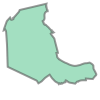

In [13]:
polygon

In [4]:
# Example factory points: list of dicts
factories = [
    {"name": "Factory A", "lat": 14.05, "long": 100.35},
    {"name": "Factory B", "lat": 13.97, "long": 100.33},
    {"name": "Factory C", "lat": 14.10, "long": 100.28},  # Might be outside
]


In [15]:
# Center the map on the first factory
center_lat = factories[0]['lat']
center_lng = factories[0]['long']
m = folium.Map(location=[center_lat, center_lng], zoom_start=11)

# Add the polygon (convert coordinates from (lon, lat) to (lat, lon))
polygon_coords = [(lon, lat) for lon, lat in polygon.exterior.coords]
folium.Polygon(
    locations=polygon_coords,
    color="blue", fill=True, fill_opacity=0.2,
    popup="Polygon"
    
).add_to(m)

# Add factory markers
for f in factories:
    lat, lng = f["lat"], f["long"]
    point = Point(lat,lng)

    is_inside = polygon.contains(point)  # use covers instead of contains
    if is_inside :
        color = "green"
    else :
        color = "red"
    folium.Marker(
        location=[lat, lng],
        popup=f"{f['name']}<br>Inside: {is_inside}",
        icon=folium.Icon(color=color)
    ).add_to(m)

m  # Display map


In [13]:
from shapely import Polygon,MultiPolygon
import json

In [21]:

def get_district_polygon(file:str):

    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)

    # processing data for the plot
    center_lat = float(data['coordinates'][0]['center']['lat'])
    center_lng = float(data['coordinates'][0]['center']['lng'])

    coordinates = data['coordinates']
    island = [] #A list of tuple
    for blob in coordinates:
        plot_coordinate = []
        for point in blob['coor']:
            point_tuple = (point['lat'],point['lng'])
            plot_coordinate.append(point_tuple)
        island.append(Polygon(island))
    if len(island) == 1:
        print(f"returned {file} as a Polygon")
        return Polygon(island[0])#create polygon
    print(f"returned {file} as a MultiPolygon")
    return MultiPolygon(island)#create Multipolygon in case of multiple landmass

In [16]:
file = "../data/subdistrict_coordinates/100102วังบูรพาภิรมย์.json"
print(get_district_polygon(file))

returned ../data/subdistrict_coordinates/100102วังบูรพาภิรมย์.json as a Polygon
POLYGON EMPTY


In [22]:
file = "../data/subdistrict_coordinates/100102วังบูรพาภิรมย์.json"
print(get_district_polygon(file))

returned ../data/subdistrict_coordinates/100102วังบูรพาภิรมย์.json as a Polygon
POLYGON EMPTY


In [ ]:
with open(file, "r", encoding="utf-8") as f:
    data = json.load(f)
coor = data['coordinates']
coor
print(f"type(coor) : {type(coor)}")
print(f"len(coor) : {len(coor)}")
for blob in coor:
    print(f"    type(blob) : {type(blob)}")
    print(f"    len(blob) : {len(blob)}")
    for point in blob:
        print(f"        type(point) : {type(point)}")
        print(f"        len(point) : {len(point)}")
        for x in blob:
            print(f"            type(x) : {type(x)}")
            print(f"             len(x) : {len(x)}")

type(coor) : <class 'list'>
len(coor) : 1
    type(blob) : <class 'dict'>
    len(blob) : 2
        type(point) : <class 'str'>
        len(point) : 6
         type(x) : <class 'str'>
            len(x) : 6
         type(x) : <class 'str'>
            len(x) : 4
        type(point) : <class 'str'>
        len(point) : 4
         type(x) : <class 'str'>
            len(x) : 6
         type(x) : <class 'str'>
            len(x) : 4
